In [1]:
import os
import platform
import pandas as pd
import numpy as np
from glob import glob

from tensorflow import keras

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import utils
import models


Tensorflow version : 2.10.1

Tensorflow devices available : 
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2699538139950674383
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22672310272
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1285623852169483370
physical_device_desc: "device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:61:00.0, compute capability: 8.6"
xla_global_id: 416903419
]

Tensorflow physical devices available : 
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
mrnet_dataset_dir = 'Data/MRNet-v1.0'
mrnet_train_path = os.path.join(mrnet_dataset_dir, 'train')
mrnet_valid_path = os.path.join(mrnet_dataset_dir, 'valid')

mrnet_preprocessed_dataset_dir = 'Preprocessed_Data/MRNet-v1.0'
mrnet_preprocessed_train_path = os.path.join(mrnet_preprocessed_dataset_dir, 'train')
mrnet_preprocessed_valid_path = os.path.join(mrnet_preprocessed_dataset_dir, 'valid')

mrnet_planes = ['axial', 'coronal', 'sagittal']

In [5]:
# For running code on Windows
if platform.system() == "Windows":
    mrnet_dataset_dir = mrnet_dataset_dir.replace('/', '\\')
    mrnet_train_path = mrnet_train_path.replace('/', '\\')
    mrnet_valid_path = mrnet_valid_path.replace('/', '\\')
    
    mrnet_preprocessed_dataset_dir = mrnet_preprocessed_dataset_dir.replace('/', '\\')
    mrnet_preprocessed_train_path = mrnet_preprocessed_train_path.replace('/', '\\')
    mrnet_preprocessed_valid_path = mrnet_preprocessed_valid_path.replace('/', '\\')

In [6]:
mrnet_datasets = {'train': mrnet_train_path, 'valid': mrnet_valid_path}
mrnet_classes = ['abnormal', 'acl', 'meniscus']

In [7]:
# TRAIN DATASET
for label in mrnet_classes:
    if platform.system() == "Windows":
        if label == 'abnormal':
            train_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-{label}.csv",
                                            header=None,
                                            names=['Case','Abnormal'],
                                            dtype={'Case':str, 'Abnormal':np.int64})
        elif label == 'acl':
            train_acl_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-{label}.csv",
                                            header=None,
                                            names=['Case','ACL'],
                                            dtype={'Case':str, 'ACL':np.int64})
        if label == 'meniscus':
            train_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-{label}.csv",
                                            header=None,
                                            names=['Case','Meniscus'],
                                            dtype={'Case':str, 'Meniscus':np.int64})
    else:
        if label == 'abnormal':
            train_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}/train-{label}.csv",
                                            header=None,
                                            names=['Case','Abnormal'],
                                            dtype={'Case':str, 'Abnormal':np.int64})
        elif label == 'acl':
            train_acl_df = pd.read_csv(f"{mrnet_dataset_dir}/train-{label}.csv",
                                            header=None,
                                            names=['Case','ACL'],
                                            dtype={'Case':str, 'ACL':np.int64})
        if label == 'meniscus':
            train_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}/train-{label}.csv",
                                            header=None,
                                            names=['Case','Meniscus'],
                                            dtype={'Case':str, 'Meniscus':np.int64})
            
mrnet_train_df = pd.merge(train_abnormal_df, train_acl_df, on='Case').merge(train_meniscus_df, on='Case')

In [8]:
# VALID DATASET
for label in mrnet_classes:
    if platform.system() == "Windows":
        if label == 'abnormal':
            valid_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-{label}.csv",
                                            header=None,
                                            names=['Case','Abnormal'],
                                            dtype={'Case':str, 'Abnormal':np.int64})
        elif label == 'acl':
            valid_acl_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-{label}.csv",
                                            header=None,
                                            names=['Case','ACL'],
                                            dtype={'Case':str, 'ACL':np.int64})
        if label == 'meniscus':
            valid_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-{label}.csv",
                                            header=None,
                                            names=['Case','Meniscus'],
                                            dtype={'Case':str, 'Meniscus':np.int64})
    else:
        if label == 'abnormal':
            valid_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-{label}.csv",
                                            header=None,
                                            names=['Case','Abnormal'],
                                            dtype={'Case':str, 'Abnormal':np.int64})
        elif label == 'acl':
            valid_acl_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-{label}.csv",
                                            header=None,
                                            names=['Case','ACL'],
                                            dtype={'Case':str, 'ACL':np.int64})
        if label == 'meniscus':
            valid_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-{label}.csv",
                                            header=None,
                                            names=['Case','Meniscus'],
                                            dtype={'Case':str, 'Meniscus':np.int64})

mrnet_valid_df = pd.merge(valid_abnormal_df, valid_acl_df, on='Case').merge(valid_meniscus_df, on='Case')

In [9]:
# AUGMENTED TRAIN LABELS
if platform.system() == "Windows":
    mrnet_train_aug_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-aug.csv",
                                     index_col=0,
                                     dtype={'Case':str, 'Abnormal':np.int64, 'ACL':np.int64, 'Meniscus':np.int64})
else:
    mrnet_train_aug_df = pd.read_csv(f"{mrnet_dataset_dir}/train-aug.csv",
                                     index_col=0,
                                     dtype={'Case':str, 'Abnormal':np.int64, 'ACL':np.int64, 'Meniscus':np.int64})

In [10]:
# AUGMENTED VALID LABELS
if platform.system() == "Windows":
    mrnet_valid_aug_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-aug.csv",
                                     index_col=0,
                                     dtype={'Case':str, 'Abnormal':np.int64, 'ACL':np.int64, 'Meniscus':np.int64})
else:
    mrnet_valid_aug_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-aug.csv",
                                     index_col=0,
                                     dtype={'Case':str, 'Abnormal':np.int64, 'ACL':np.int64, 'Meniscus':np.int64})

In [11]:
# We are working only with Sagittal plane

# TRAIN
if platform.system() == "Windows":
    mrnet_sagittal_train_files = glob(mrnet_preprocessed_train_path+"\\sagittal\\*.npy")
else:
    mrnet_sagittal_train_files = glob(mrnet_preprocessed_train_path+"/sagittal/*.npy")
mrnet_sagittal_train_files.sort()

# VALID
if platform.system() == "Windows":
    mrnet_sagittal_valid_files = glob(mrnet_preprocessed_valid_path+"\\sagittal\\*.npy")
else:
    mrnet_sagittal_valid_files = glob(mrnet_preprocessed_valid_path+"/sagittal/*.npy")
mrnet_sagittal_valid_files.sort()

# AUGMENTED TRAIN
if platform.system() == "Windows":
    mrnet_sagittal_train_aug_files = glob(mrnet_preprocessed_train_path+"\\sagittal\\aug\\*.npy")
else:
    mrnet_sagittal_train_aug_files = glob(mrnet_preprocessed_train_path+"/sagittal/aug/*.npy")
mrnet_sagittal_train_aug_files.sort()

# AUGMENTED VALID
if platform.system() == "Windows":
    mrnet_sagittal_valid_aug_files = glob(mrnet_preprocessed_valid_path+"\\sagittal\\aug\\*.npy")
else:
    mrnet_sagittal_valid_aug_files = glob(mrnet_preprocessed_valid_path+"/sagittal/aug/*.npy")
mrnet_sagittal_valid_aug_files.sort()

In [12]:
mrnet_filenames = []
mrnet_filenames.extend(mrnet_sagittal_train_files)
mrnet_filenames.extend(mrnet_sagittal_valid_files)
mrnet_filenames.extend(mrnet_sagittal_train_aug_files)
mrnet_filenames.extend(mrnet_sagittal_valid_aug_files)
mrnet_filenames.sort()

In [13]:
mrnet_full_df = pd.concat([mrnet_train_df, mrnet_valid_df, mrnet_train_aug_df, mrnet_valid_aug_df], ignore_index=True)

In [14]:
mrnet_labels = utils.get_correct_labels_mrnet(mrnet_filenames, mrnet_full_df)

### Prior to training

In [15]:
BATCH_SIZE = 8
EPOCHS = 100

# Splitting into train, test and validation

X, X_test, y, y_test = train_test_split(mrnet_filenames, 
                                        mrnet_labels, 
                                        test_size=0.1, 
                                        random_state=610, 
                                        shuffle=True, 
                                        stratify=mrnet_labels)

X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      train_size=0.7, 
                                                      random_state=610, 
                                                      shuffle=True, 
                                                      stratify=y)

In [16]:
mrnet_class_weights = utils.compute_class_weights(y_train)

In [17]:
mrnet_class_weights

{0: 1.0076923076923077, 1: 0.9924242424242424}

# Transfer Learning Models

## Model 1 : VGG16 for 256x256x3

In [26]:
model_name = 'MRNet_Model_TF_3_VGG'
MRNet_Model_TF_3_VGG = models.mri_model_tf_3_vgg(model_name, 2)
MRNet_Model_TF_3_VGG.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
MRNet_Model_TF_3_VGG.summary()

Model: "MRNet_Model_TF_3_VGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               16777728  
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)      

In [27]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model_TF_3_VGG.fit(utils.batch_generator_tf_3(X_train, y_train, BATCH_SIZE),
                                       steps_per_epoch=len(X_train)//BATCH_SIZE,
                                       epochs=EPOCHS,
                                       validation_data=utils.batch_generator_tf_3(X_valid, y_valid, BATCH_SIZE),
                                       validation_steps=len(X_valid)//BATCH_SIZE, 
                                       shuffle=True,
                                       class_weight=mrnet_class_weights,
                                       verbose=1,
                                       callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 54s 329ms/step - loss: 0.6572 - accuracy: 0.6725 - val_loss: 0.4635 - val_accuracy: 0.7786
Epoch 2/100
163/163 [==============================] - 43s 265ms/step - loss: 0.5324 - accuracy: 0.7561 - val_loss: 0.4300 - val_accuracy: 0.8107
Epoch 3/100
163/163 [==============================] - 42s 260ms/step - loss: 0.4615 - accuracy: 0.7922 - val_loss: 0.4518 - val_accuracy: 0.7821
Epoch 4/100
163/163 [==============================] - 43s 263ms/step - loss: 0.4152 - accuracy: 0.8236 - val_loss: 0.4112 - val_accuracy: 0.8339
Epoch 5/100
163/163 [==============================] - 42s 261ms/step - loss: 0.3487 - accuracy: 0.8505 - val_loss: 0.4740 - val_accuracy: 0.7804
Epoch 6/100
163/163 [==============================] - 42s 261ms/step - loss: 0.3527 - accuracy: 0.8497 - val_loss: 0.3833 - val_accuracy: 0.8286
Epoch 7/100
163/163 [==============================] - 42s 259ms/step - loss: 0.3073 - accuracy: 0.8650 - val_loss: 0.4612 -

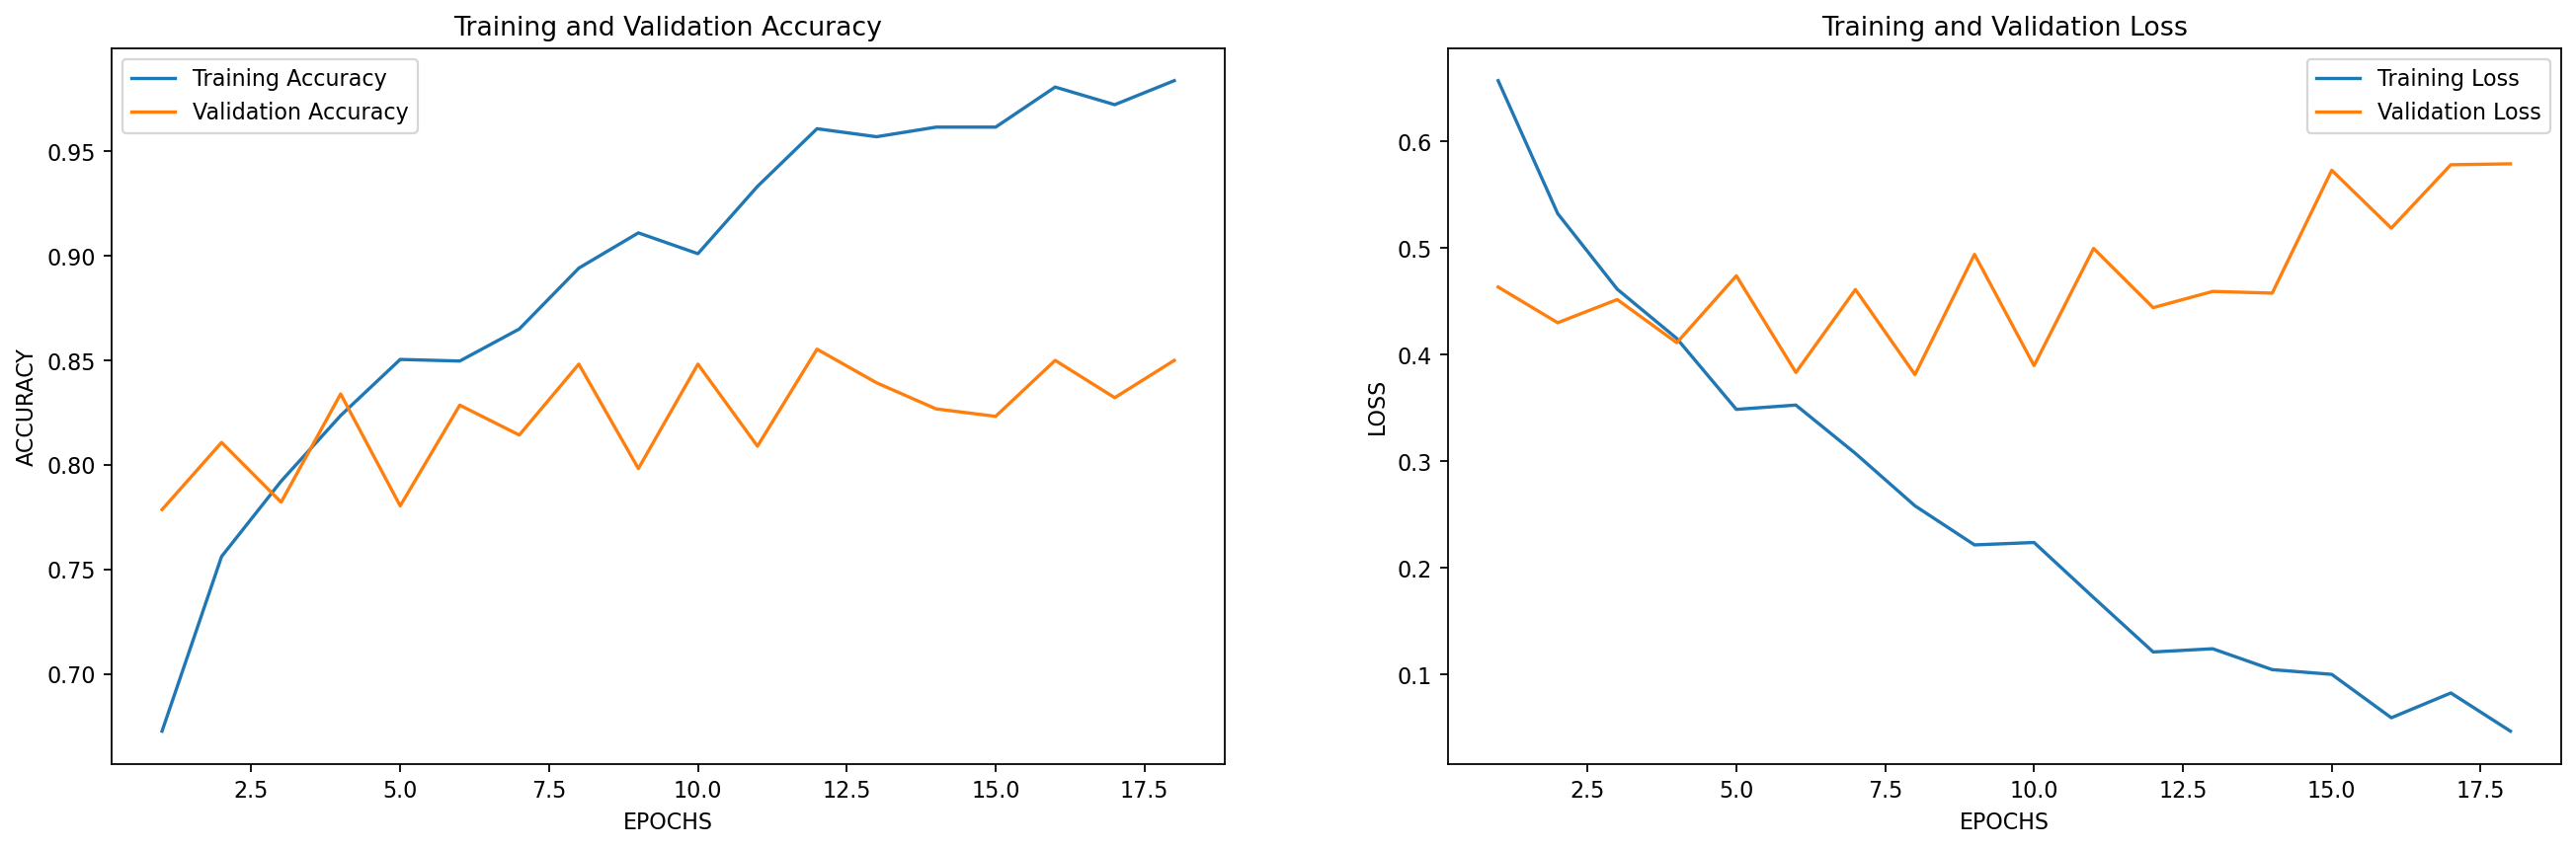

In [28]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 6s 229ms/step
Best cutoff Threshold=0.452761, F-Score=0.829


 Evaluation Metrics:


Balanced Accuracy : 0.82
Precision : 0.79
Recall : 0.88
F1 Score: 0.83
ROC AUC Score : 0.89
Classification report : 
              precision    recall  f1-score   support

     Healthy       0.86      0.76      0.80       103
        Tear       0.79      0.88      0.83       105

    accuracy                           0.82       208
   macro avg       0.82      0.82      0.82       208
weighted avg       0.82      0.82      0.82       208

Confusion Matrix : 


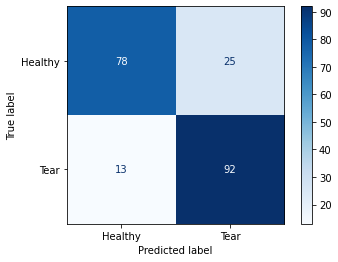

In [29]:
# Evaluate model
X_test_prob = MRNet_Model_TF_3_VGG.predict(utils.predict_batch_generator_tf_3(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])

## Model 2 : Xception for 256x256x3

In [30]:
model_name = 'MRNet_Model_TF_3_Xception'
MRNet_Model_TF_3_Xception = models.mri_model_tf_3_xception(model_name, 2)
MRNet_Model_TF_3_Xception.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
MRNet_Model_TF_3_Xception.summary()

Model: "MRNet_Model_TF_3_Xception"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 131072)            0         
                                                                 
 dense_16 (Dense)            (None, 512)               67109376  
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128) 

In [31]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model_TF_3_Xception.fit(utils.batch_generator_tf_3(X_train, y_train, BATCH_SIZE),
                                            steps_per_epoch=len(X_train)//BATCH_SIZE,
                                            epochs=EPOCHS,
                                            validation_data=utils.batch_generator_tf_3(X_valid, y_valid, BATCH_SIZE),
                                            validation_steps=len(X_valid)//BATCH_SIZE, 
                                            shuffle=True,
                                            class_weight=mrnet_class_weights,
                                            verbose=1,
                                            callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 52s 306ms/step - loss: 0.9421 - accuracy: 0.6035 - val_loss: 0.5380 - val_accuracy: 0.7464
Epoch 2/100
163/163 [==============================] - 45s 275ms/step - loss: 0.6207 - accuracy: 0.7040 - val_loss: 0.5175 - val_accuracy: 0.7571
Epoch 3/100
163/163 [==============================] - 45s 276ms/step - loss: 0.5364 - accuracy: 0.7377 - val_loss: 0.5028 - val_accuracy: 0.7839
Epoch 4/100
163/163 [==============================] - 45s 275ms/step - loss: 0.4760 - accuracy: 0.7830 - val_loss: 0.4718 - val_accuracy: 0.8000
Epoch 5/100
163/163 [==============================] - 45s 276ms/step - loss: 0.3931 - accuracy: 0.8213 - val_loss: 0.4699 - val_accuracy: 0.7893
Epoch 6/100
163/163 [==============================] - 43s 263ms/step - loss: 0.3666 - accuracy: 0.8397 - val_loss: 0.4834 - val_accuracy: 0.7893
Epoch 7/100
163/163 [==============================] - 45s 277ms/step - loss: 0.3188 - accuracy: 0.8589 - val_loss: 0.4527 -

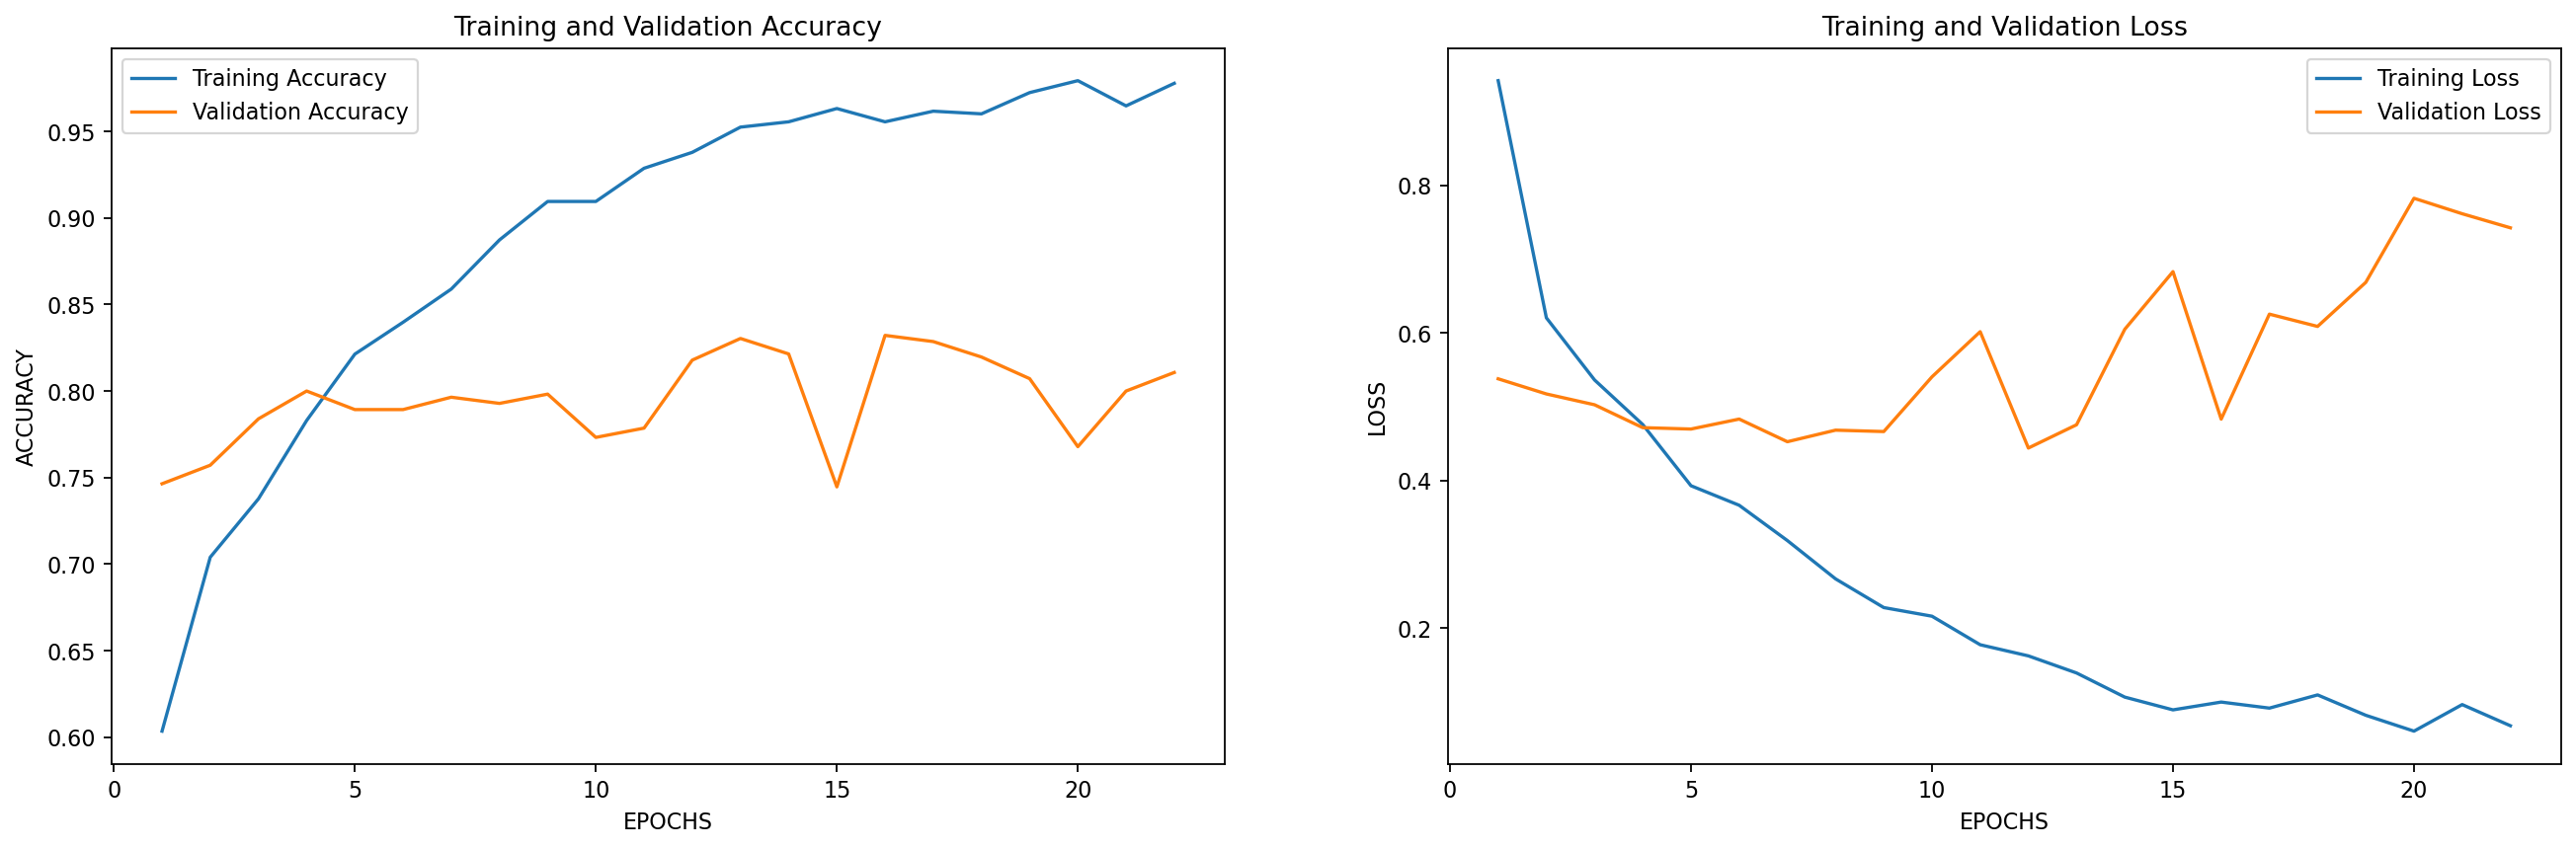

In [32]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 9s 307ms/step
Best cutoff Threshold=0.183864, F-Score=0.812


 Evaluation Metrics:


Balanced Accuracy : 0.79
Precision : 0.74
Recall : 0.9
F1 Score: 0.81
ROC AUC Score : 0.85
Classification report : 
              precision    recall  f1-score   support

     Healthy       0.87      0.67      0.76       103
        Tear       0.74      0.90      0.81       105

    accuracy                           0.79       208
   macro avg       0.80      0.79      0.79       208
weighted avg       0.80      0.79      0.79       208

Confusion Matrix : 


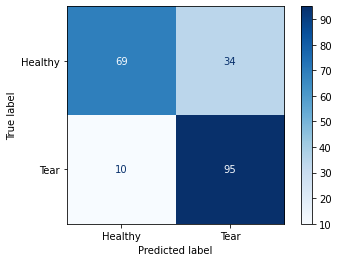

In [33]:
# Evaluate model
X_test_prob = MRNet_Model_TF_3_Xception.predict(utils.predict_batch_generator_tf_3(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])

## Model 3 : ResNet 256x256x3

In [56]:
model_name = 'MRNet_Model_TF_3_ResNet'
MRNet_Model_TF_3_ResNet = models.mri_model_tf_3_vgg(model_name, 2)
MRNet_Model_TF_3_ResNet.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
MRNet_Model_TF_3_ResNet.summary()

Model: "MRNet_Model_TF_3_ResNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0         
                                                                 
 dense_24 (Dense)            (None, 512)               16777728  
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)   

In [57]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model_TF_3_ResNet.fit(utils.batch_generator_tf_3(X_train, y_train, BATCH_SIZE),
                                       steps_per_epoch=len(X_train)//BATCH_SIZE,
                                       epochs=EPOCHS,
                                       validation_data=utils.batch_generator_tf_3(X_valid, y_valid, BATCH_SIZE),
                                       validation_steps=len(X_valid)//BATCH_SIZE, 
                                       shuffle=True,
                                       class_weight=mrnet_class_weights,
                                       verbose=1,
                                       callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 54s 327ms/step - loss: 0.6683 - accuracy: 0.6756 - val_loss: 0.4754 - val_accuracy: 0.7750
Epoch 2/100
163/163 [==============================] - 47s 291ms/step - loss: 0.5281 - accuracy: 0.7523 - val_loss: 0.4298 - val_accuracy: 0.7946
Epoch 3/100
163/163 [==============================] - 43s 267ms/step - loss: 0.4479 - accuracy: 0.8014 - val_loss: 0.4587 - val_accuracy: 0.7929
Epoch 4/100
163/163 [==============================] - 43s 268ms/step - loss: 0.4204 - accuracy: 0.8113 - val_loss: 0.4187 - val_accuracy: 0.8286
Epoch 5/100
163/163 [==============================] - 42s 261ms/step - loss: 0.3687 - accuracy: 0.8298 - val_loss: 0.4219 - val_accuracy: 0.8018
Epoch 6/100
163/163 [==============================] - 43s 262ms/step - loss: 0.3508 - accuracy: 0.8489 - val_loss: 0.4131 - val_accuracy: 0.8232
Epoch 7/100
163/163 [==============================] - 42s 262ms/step - loss: 0.3240 - accuracy: 0.8681 - val_loss: 0.4097 -

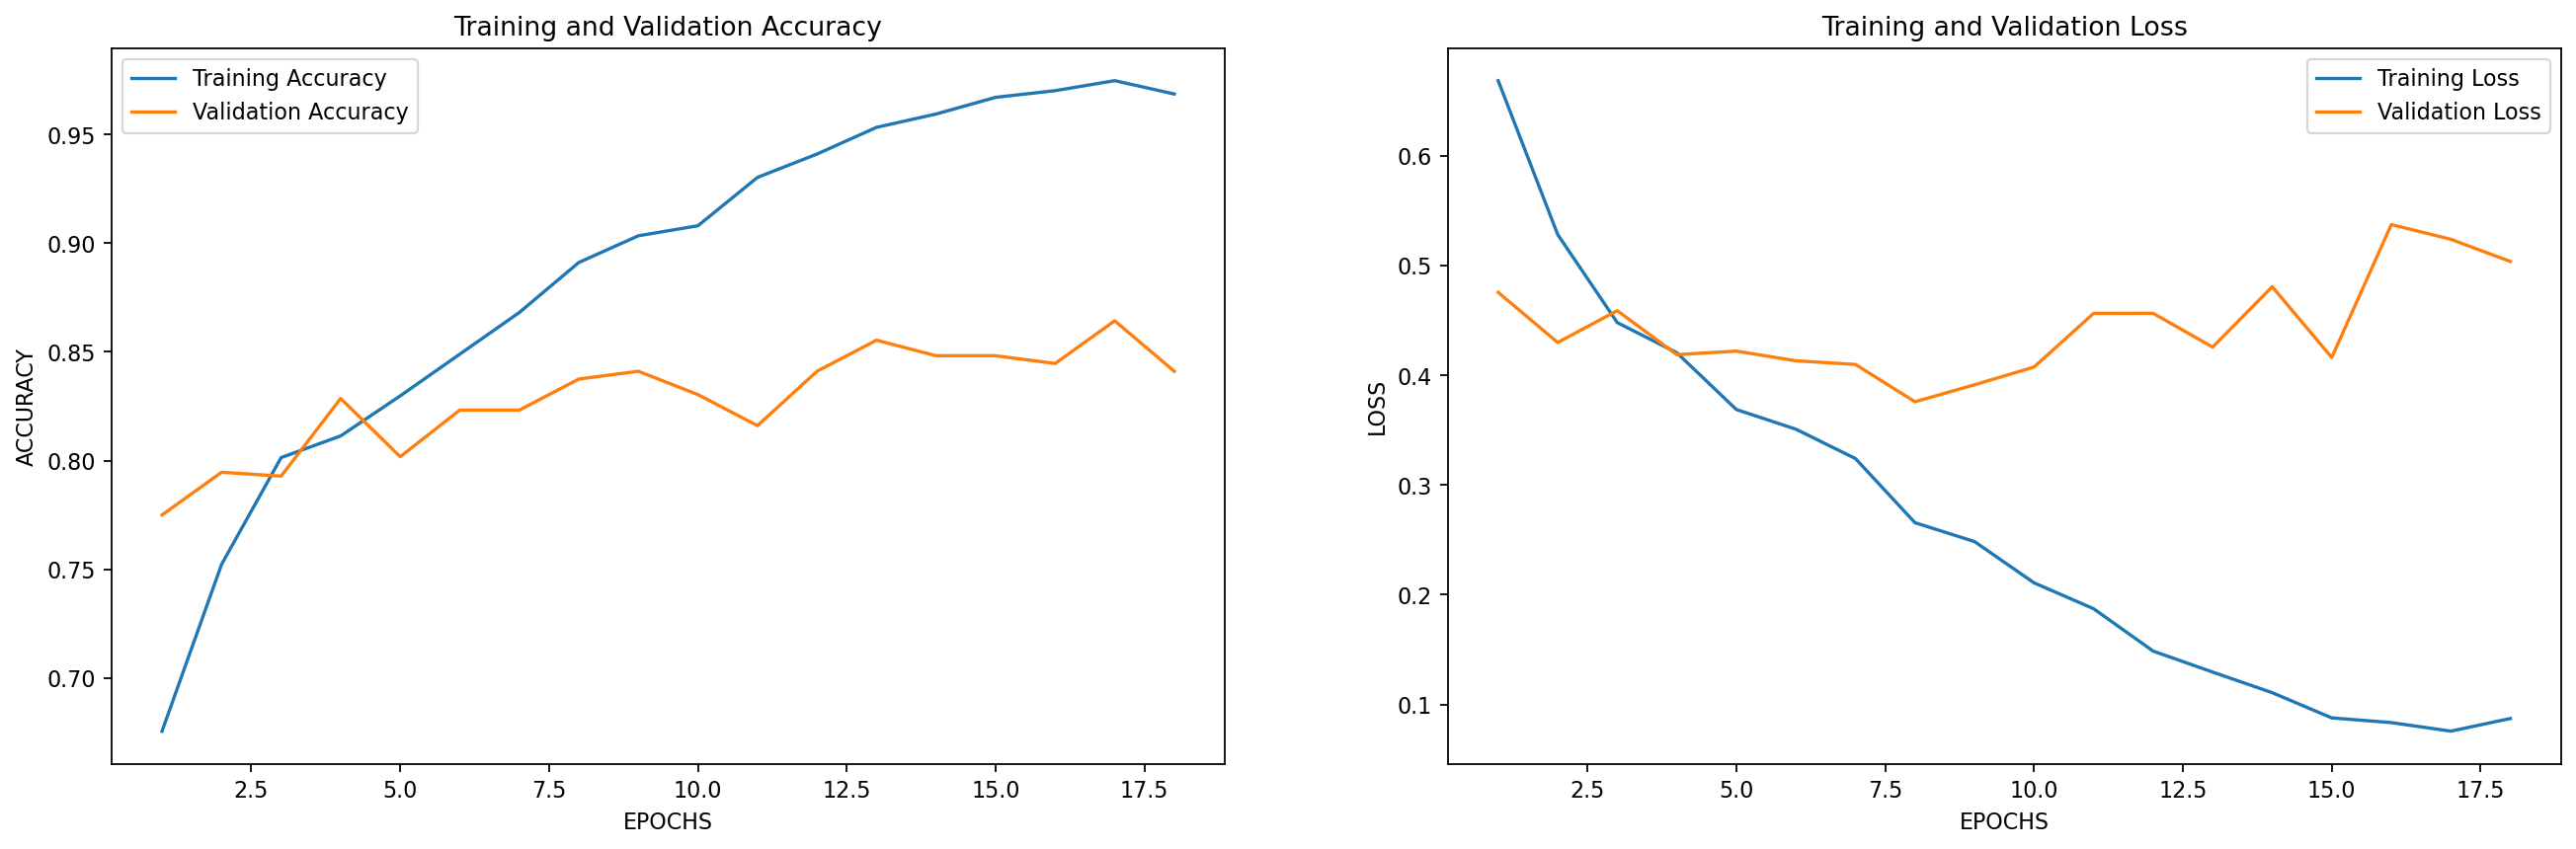

In [58]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 6s 223ms/step
Best cutoff Threshold=0.705600, F-Score=0.845


 Evaluation Metrics:


Balanced Accuracy : 0.85
Precision : 0.86
Recall : 0.83
F1 Score: 0.84
ROC AUC Score : 0.9
Classification report : 
              precision    recall  f1-score   support

     Healthy       0.83      0.86      0.85       103
        Tear       0.86      0.83      0.84       105

    accuracy                           0.85       208
   macro avg       0.85      0.85      0.85       208
weighted avg       0.85      0.85      0.85       208

Confusion Matrix : 


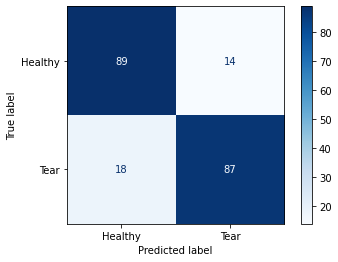

In [59]:
# Evaluate model
X_test_prob = MRNet_Model_TF_3_ResNet.predict(utils.predict_batch_generator_tf_3(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])

## Model 4 : VGG16 for 256x256x5

In [35]:
model_name = 'MRNet_Model_TF_5_VGG'
MRNet_Model_TF_5_VGG = models.mri_model_tf_5_vgg(model_name, 2)
MRNet_Model_TF_5_VGG.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
MRNet_Model_TF_5_VGG.summary()

Model: "MRNet_Model_TF_5_VGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14715840  
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_20 (Dense)            (None, 512)               16777728  
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)      

In [36]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model_TF_5_VGG.fit(utils.batch_generator_tf_5(X_train, y_train, BATCH_SIZE),
                                       steps_per_epoch=len(X_train)//BATCH_SIZE,
                                       epochs=EPOCHS,
                                       validation_data=utils.batch_generator_tf_5(X_valid, y_valid, BATCH_SIZE),
                                       validation_steps=len(X_valid)//BATCH_SIZE, 
                                       shuffle=True,
                                       class_weight=mrnet_class_weights,
                                       verbose=1,
                                       callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 54s 326ms/step - loss: 0.6928 - accuracy: 0.6296 - val_loss: 0.5141 - val_accuracy: 0.7679
Epoch 2/100
163/163 [==============================] - 48s 297ms/step - loss: 0.5433 - accuracy: 0.7301 - val_loss: 0.4633 - val_accuracy: 0.7804
Epoch 3/100
163/163 [==============================] - 44s 274ms/step - loss: 0.4943 - accuracy: 0.7646 - val_loss: 0.5459 - val_accuracy: 0.7214
Epoch 4/100
163/163 [==============================] - 45s 279ms/step - loss: 0.4123 - accuracy: 0.8221 - val_loss: 0.4822 - val_accuracy: 0.7875
Epoch 5/100
163/163 [==============================] - 68s 421ms/step - loss: 0.3873 - accuracy: 0.8275 - val_loss: 0.5217 - val_accuracy: 0.7661
Epoch 6/100
163/163 [==============================] - 46s 283ms/step - loss: 0.3534 - accuracy: 0.8397 - val_loss: 0.4933 - val_accuracy: 0.7804
Epoch 7/100
163/163 [==============================] - 46s 286ms/step - loss: 0.2903 - accuracy: 0.8742 - val_loss: 0.4357 -

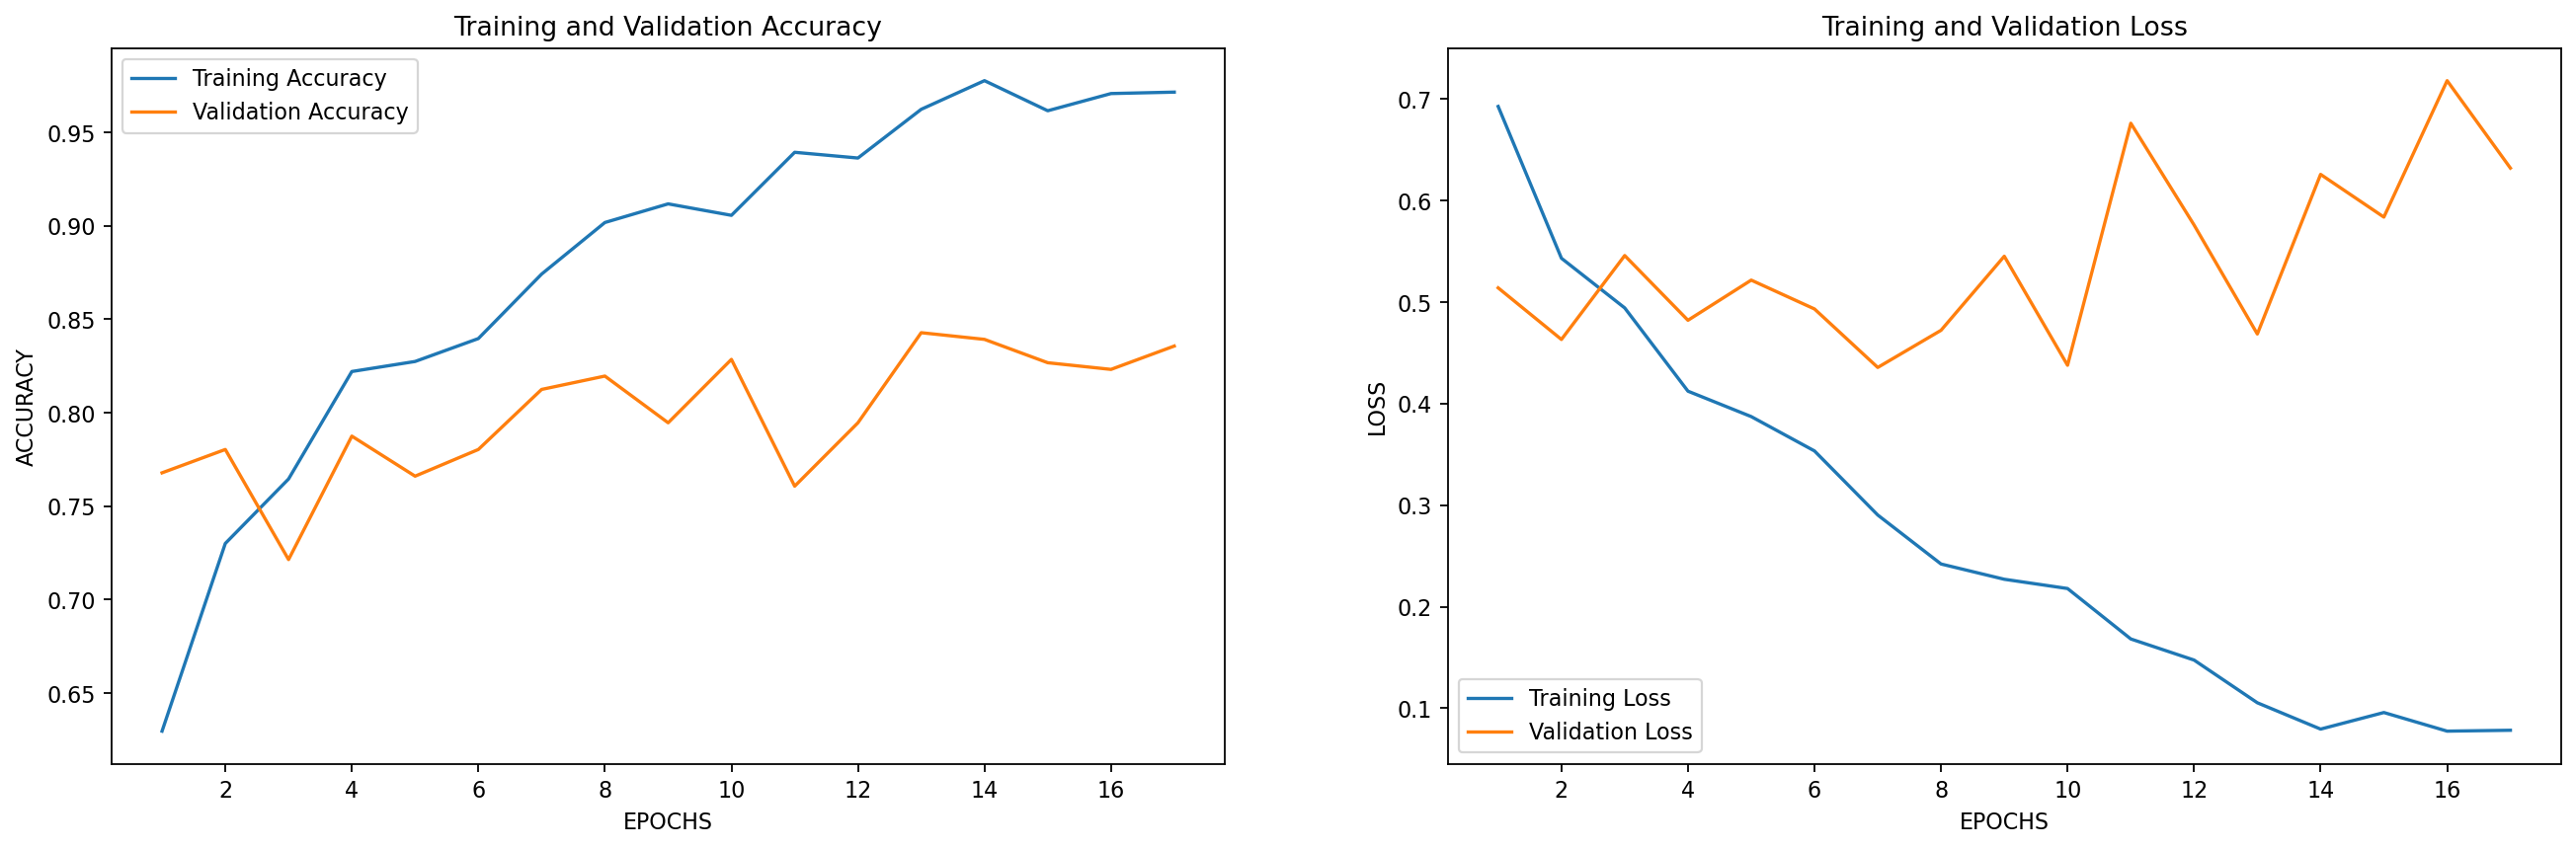

In [37]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 6s 238ms/step
Best cutoff Threshold=0.571411, F-Score=0.800


 Evaluation Metrics:


Balanced Accuracy : 0.8
Precision : 0.82
Recall : 0.78
F1 Score: 0.8
ROC AUC Score : 0.87
Classification report : 
              precision    recall  f1-score   support

     Healthy       0.79      0.83      0.81       103
        Tear       0.82      0.78      0.80       105

    accuracy                           0.80       208
   macro avg       0.80      0.80      0.80       208
weighted avg       0.80      0.80      0.80       208

Confusion Matrix : 


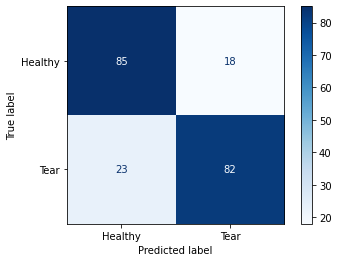

In [38]:
# Evaluate model
X_test_prob = MRNet_Model_TF_5_VGG.predict(utils.predict_batch_generator_tf_5(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])

## Model 5 : ResNet 256x256x5

In [18]:
model_name = 'MRNet_Model_TF_5_ResNet'
MRNet_Model_TF_5_ResNet = models.mri_model_tf_5_resnet(model_name, 2)
MRNet_Model_TF_5_ResNet.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
MRNet_Model_TF_5_ResNet.summary()

Model: "MRNet_Model_TF_5_ResNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23593984  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)   

In [19]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model_TF_5_ResNet.fit(utils.batch_generator_tf_5(X_train, y_train, BATCH_SIZE),
                                       steps_per_epoch=len(X_train)//BATCH_SIZE,
                                       epochs=EPOCHS,
                                       validation_data=utils.batch_generator_tf_5(X_valid, y_valid, BATCH_SIZE),
                                       validation_steps=len(X_valid)//BATCH_SIZE, 
                                       shuffle=True,
                                       class_weight=mrnet_class_weights,
                                       verbose=1,
                                       callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 60s 313ms/step - loss: 1.4550 - accuracy: 0.5468 - val_loss: 0.6207 - val_accuracy: 0.6679
Epoch 2/100
163/163 [==============================] - 44s 272ms/step - loss: 0.7916 - accuracy: 0.5989 - val_loss: 0.5901 - val_accuracy: 0.6929
Epoch 3/100
163/163 [==============================] - 44s 270ms/step - loss: 0.6209 - accuracy: 0.6733 - val_loss: 0.5428 - val_accuracy: 0.7411
Epoch 4/100
163/163 [==============================] - 44s 270ms/step - loss: 0.5502 - accuracy: 0.7163 - val_loss: 0.5253 - val_accuracy: 0.7339
Epoch 5/100
163/163 [==============================] - 43s 268ms/step - loss: 0.5035 - accuracy: 0.7561 - val_loss: 0.4981 - val_accuracy: 0.7554
Epoch 6/100
163/163 [==============================] - 41s 253ms/step - loss: 0.4734 - accuracy: 0.7707 - val_loss: 0.5038 - val_accuracy: 0.7518
Epoch 7/100
163/163 [==============================] - 40s 248ms/step - loss: 0.4314 - accuracy: 0.8006 - val_loss: 0.5001 -

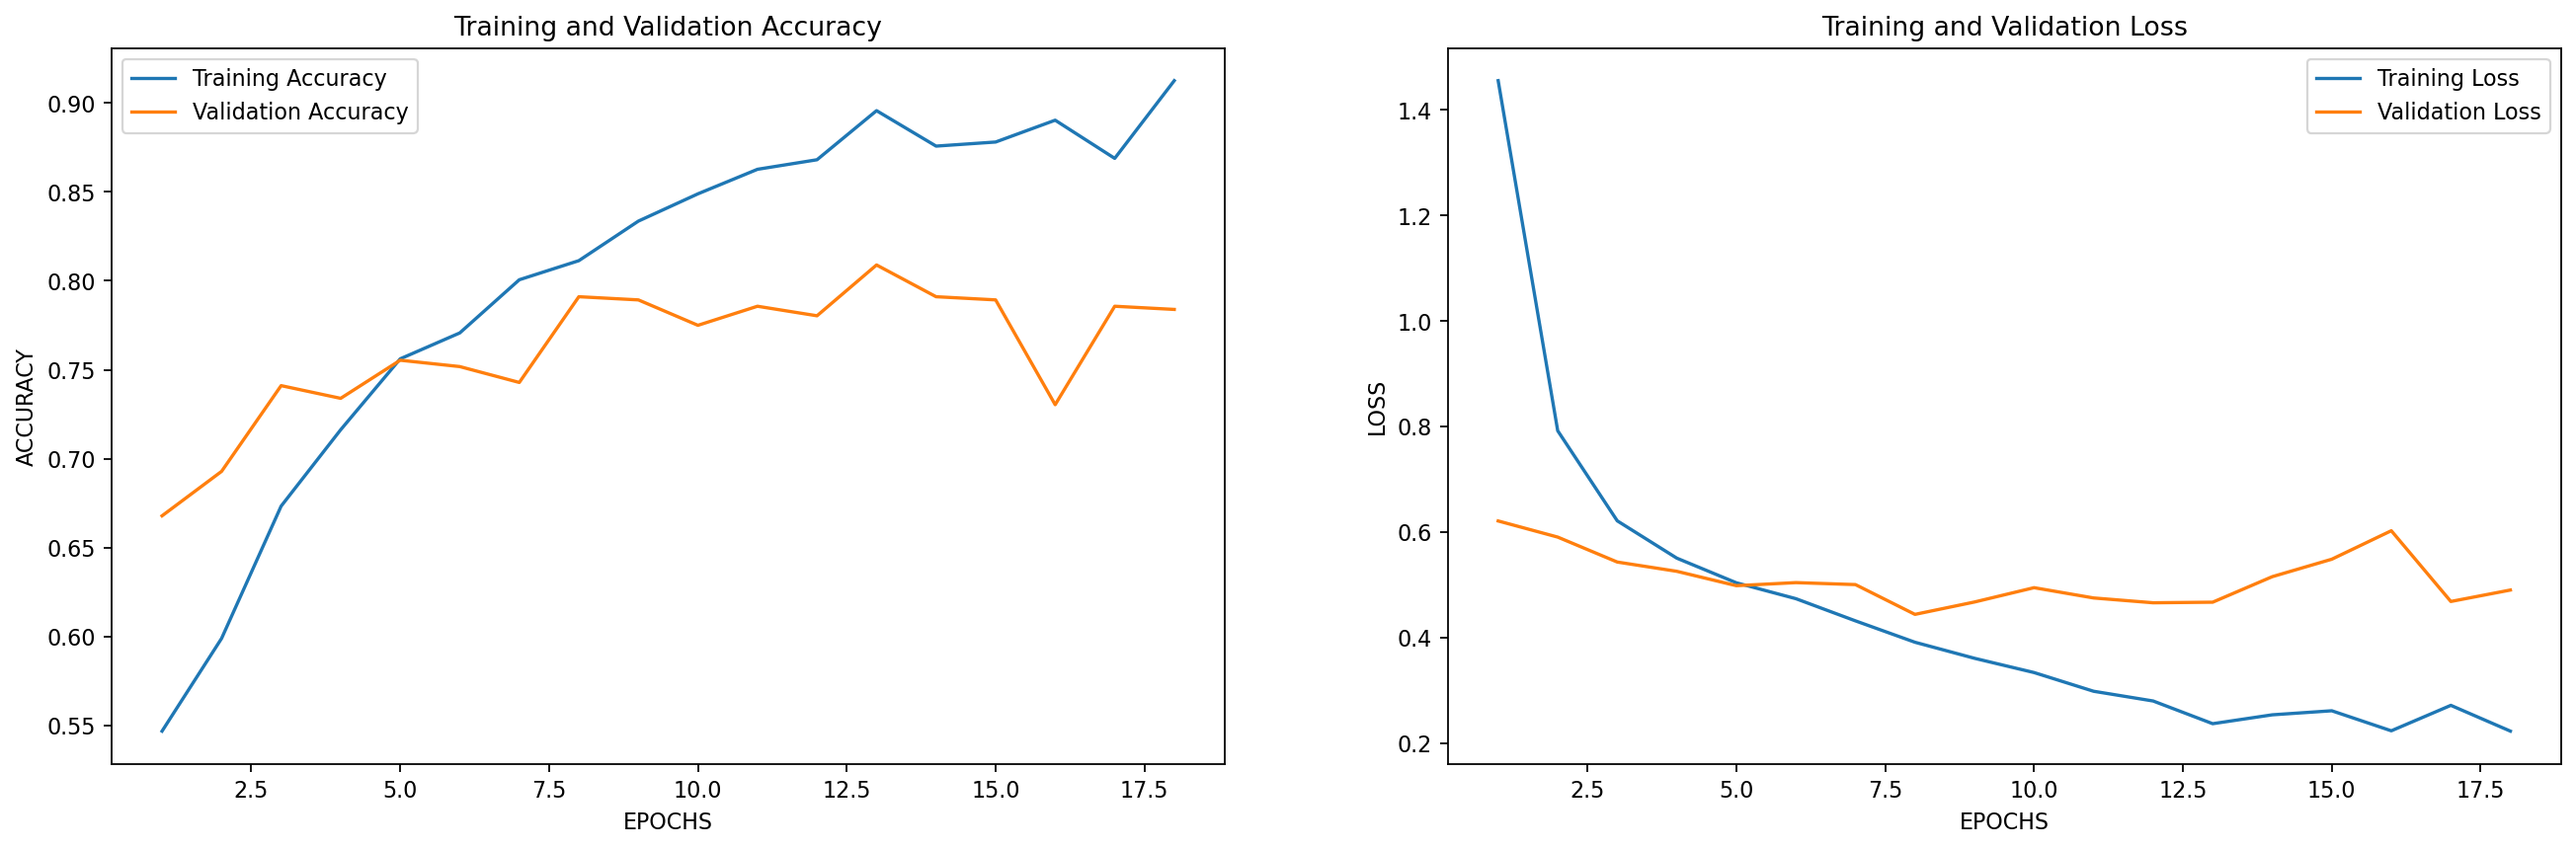

In [20]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 11s 421ms/step

Best cutoff Threshold=0.343872, F-Score=0.795

Evaluation Metrics:

Balanced Accuracy : 0.77
Precision : 0.73
Recall : 0.87
F1 Score: 0.79
ROC AUC Score : 0.87

Classification report : 
              precision    recall  f1-score   support

     Healthy       0.83      0.68      0.75       103
        Tear       0.73      0.87      0.79       105

    accuracy                           0.77       208
   macro avg       0.78      0.77      0.77       208
weighted avg       0.78      0.77      0.77       208


Confusion Matrix : 


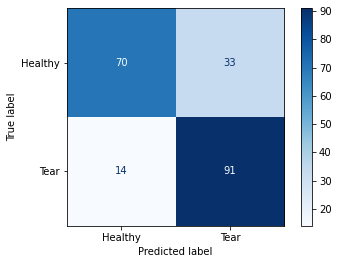

In [21]:
# Evaluate model
X_test_prob = MRNet_Model_TF_5_ResNet.predict(utils.predict_batch_generator_tf_5(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])